In [9]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wavelet import twod as w2d
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from scipy import signal
from scipy import misc
from scipy.ndimage.measurements import label
from skimage import data
from skimage.feature import match_template
%matplotlib inline

In [21]:
#Read Conni's file
ccfile = "/users/global/cornkle/wtest/845_mt_wavelet_test.nc"
fh = Dataset(ccfile, mode='r')
pcp = fh.variables['trmm'][:]
tir = fh.variables['msg'][:]
lat = fh.variables['lat'][:]
lon = fh.variables['lon'][:]

dt = 5. #grid spacing in km

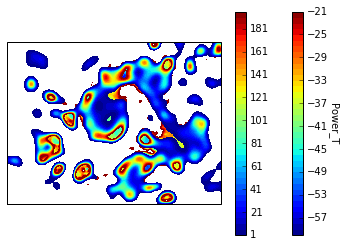

In [50]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon, lat ,tir,levels=np.arange(-60,-20,1), transform=ccrs.PlateCarree(), cmap='jet')
cbar=plt.colorbar()
cbar.set_label('Power_T', rotation=270, labelpad=+11)
plt.contourf(lon, lat, t,levels=np.arange(1,200,5), transform=ccrs.PlateCarree())
cbar=plt.colorbar()
plt.savefig('/users/global/cornkle/test1.pdf')

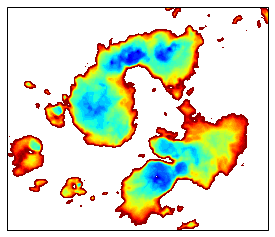

In [51]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon, lat ,tir,levels=np.arange(-60,-20,1), transform=ccrs.PlateCarree(), cmap='jet')
#cbar=plt.colorbar()
#cbar.set_label('Power_T', rotation=270, labelpad=+11)
#plt.contourf(lon, lat, t,levels=np.arange(1,200,5), transform=ccrs.PlateCarree())
#cbar=plt.colorbar()
plt.savefig('/users/global/cornkle/test2.pdf')

In [23]:
#2D continuous wavelet analysis:
#TIR
tiror = np.copy(tir)
tir[tir>0] = 0
tir = tir - np.mean(tir) 
mother2d = w2d.Mexican_hat()
powerTIR, scales2d, freqs2d = w2d.cwt2d(tir, dt, dt, dj=1./12, s0=30./mother2d.flambda(), J=45)
powerTIR[np.real(powerTIR>=0)] = 0.01
powerTIR = (np.abs(powerTIR)) ** 2 # Normalized wavelet power spectrum
period2d = 1. / freqs2d
scales2d.shape = (len(scales2d),1,1)
powerTIR = powerTIR / (scales2d**2)

In [60]:
(period2d/2).round()[20]

48.0

In [25]:
#Precip
powerPCP, scales2d, freqs2d = w2d.cwt2d(pcp, dt, dt, dj=1./12, s0=30./mother2d.flambda(), J=45)
powerPCP[np.real(powerPCP<=0)] = 0.01
powerPCP = (np.abs(powerPCP)) ** 2 # Normalized wavelet power spectrum
scales2d.shape = (len(scales2d),1,1)
powerPCP = powerPCP / (scales2d**2)

In [26]:
t=powerTIR[20,:,:]
p=powerPCP[20,:, :]

#tc=1.*((t-t.mean())/t.std())/np.sqrt(len(tc.flatten()))
#pc=1.*(p-p.mean())/p.std()/np.sqrt(len(tc.flatten()))


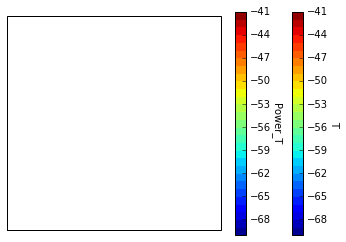

In [33]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon, lat, tir,levels=np.arange(-70,-40,1), transform=ccrs.PlateCarree())
cbar=plt.colorbar()
cbar.set_label('T', rotation=270, labelpad=+11)
#plt.contourf(lon, lat ,t,levels=np.arange(1,100,1), transform=ccrs.PlateCarree(), cmap='jet')
cbar=plt.colorbar()
cbar.set_label('Power_T', rotation=270, labelpad=+11)



In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon, lat ,t,levels=np.arange(1,100,1), transform=ccrs.PlateCarree(), cmap='jet')
cbar=plt.colorbar()
cbar.set_label('Power_T', rotation=270, labelpad=+11)
plt.contourf(lon, lat, p,levels=np.arange(1,100,5), transform=ccrs.PlateCarree())
cbar=plt.colorbar()
cbar.set_label('Power_P', rotation=270, labelpad=+11)
plt.contour(lon, lat, p,levels=np.arange(1,100,5), transform=ccrs.PlateCarree())

In [349]:
corr = signal.correlate2d(tc, pc[5:-5,5:-5] , mode='valid')
y, x = np.unravel_index(np.argmax(corr), corr.shape) # find the match~

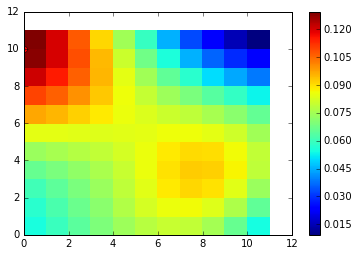

In [350]:
plt.pcolormesh(corr)
plt.colorbar()
plt.plot(x, y, 'ro')

In [52]:
corr2 = match_template(t, p[5:-5, 5:-5])

In [53]:
corr2.shape
y,x = np.unravel_index(np.argmax(corr2), corr2.shape)

10 0


(11, 11)

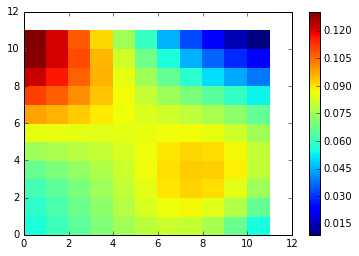

In [54]:
plt.pcolormesh(corr2)
plt.colorbar()
plt.plot(x, y, 'ro')
print(y,x)
corr2.shape

In [57]:
xx=[]
yy=[]
for k in range(10,25):
    
    t=powerTIR[k,:,:]
    p=powerPCP[k,:, :]
    corr2 = match_template(t, p[10:-10, 10:-10])
    y,x = np.unravel_index(np.argmax(corr2), corr2.shape)
    xx.append(x)
    yy.append(y)
    print(int(period2d[k]/2.))
print(int(period2d[16]/2.))
print(xx)
print(yy)

26
28
30
31
33
35
37
40
42
44
47
50
53
56
60
37
[0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6]
[14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 13, 11]


In [58]:
t=powerTIR[16,:,:]
p=powerPCP[16,:, :]
corr2 = match_template(t, p[10:-10, 10:-10])
y,x = np.unravel_index(np.argmax(corr2), corr2.shape)

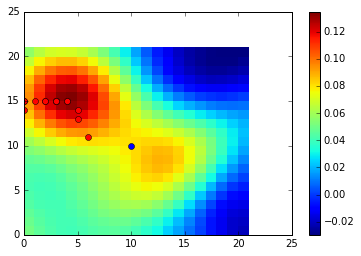

In [59]:
t=powerTIR[20,:,:]
p=powerPCP[20,:, :]
corr2 = match_template(t, p[10:-10, 10:-10])
plt.pcolormesh(corr2)
plt.colorbar()
plt.plot(10,10, 'bo')
for k in range(len(xx)):
    plt.plot(xx[k],yy[k], 'ro')
plt.savefig('/users/global/cornkle/730_26-60.pdf')